In [43]:
import tensorflow as tf
import numpy as np
import csv

with open('ecgData/101.csv') as csv_file:
  list1 = []
  list2 = []
  list3 = []
  line_count = 0
  reader = csv.reader(csv_file, delimiter=',')

  for row in reader:
    if line_count == 0:
      line_count += 1
      continue
    list1.append(row[0])
    list2.append(row[1])
    list3.append(row[2])

    

0
955
992
650000


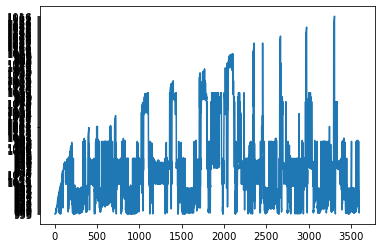

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(0, 3600), list2[0:3600])

print(list1[0])
print(list2[0])
print(list3[0])

print(len(list1))


Step 1: Import the data into some kind of structure (likely numpy)
Step 2: Pass through a frequency band-pass filter to cancel power line oscillations and slow drifts, "butterworth filter" - cutoff 0.4Hz and 45Hz.
Step 3: Deal with missing values

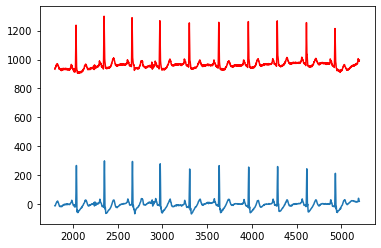

In [52]:
from scipy.signal import butter, sosfilt, sosfreqz

list3 = np.array(list3)

list3 = list3.astype(float)

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

filtered = butter_bandpass_filter(list3[0:5200], 0.4, 45, 360)

plt.plot(range(1800, 5200), filtered[1800:5200])
plt.plot(range(1800,5200), list3[1800:5200], color="red")


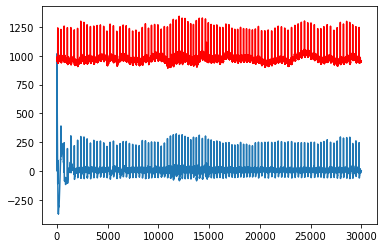

In [48]:
filtered = butter_bandpass_filter(list3[0: 30000], 0.4, 45, 360)

plt.plot(range(0, 30000), filtered)
plt.plot(range(0, 30000), list3[0:30000], color="red")